In [42]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt


In [43]:
#df = pd.read_csv('genepresenceabsencefiltered.csv', index_col = 0, sep = ';')
df = pd.read_csv('/home/lf481323/Roary_output_all_last_touse/gene_presence_absence.csv', index_col = 0, sep = ',')
df = df.rename(columns=lambda x: x.split('_')[0])
df.to_csv("/home/lf481323/Roary_output_all_last_touse/gene_presence_absence.csv")

/home/lf481323/.conda/envs/torchGeoM/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253

In [40]:
df = df[df['No. isolates'] > 4]
df = df[df['No. isolates'] <= 415]
df.rename(columns=lambda x: x.split('_')[0])

,Non-unique Gene name,Annotation,No. isolates,No. sequences,Avg sequences per isolate,Genome Fragment,Order within Fragment,Accessory Fragment,Accessory Order with Fragment,QC,...,61346,61347,61348,61353,61354,61379,61380,61381,61382,61383
Gene,,,,,,,,,,,,,,,,,,,,,
group_1120,NaN,hypothetical protein,415,426,1.03,1,584,NaN,NaN,Hypothetical protein with no hits to refseq/un...,...,g61346_02119,g61347_02018,g61348_02081,g61353_02189,g61354_02152,g61379_02116,g61380_02152,g61381_02023,g61382_02072,g61383_02093
porA_1,NaN,Major outer membrane protein P.IA,415,415,1.00,1,849,NaN,NaN,NaN,...,g61346_01844,g61347_01537,g61348_01517,g61353_01680,g61354_01940,g61379_01830,g61380_01629,g61381_01318,g61382_01637,g61383_01653
group_118,NaN,hypothetical protein,415,415,1.00,1,1065,NaN,NaN,NaN,...,g61346_01536,g61347_01787,g61348_01777,g61353_01629,g61354_01597,g61379_01291,g61380_01587,g61381_01377,g61382_01616,g61383_01608
group_1206,NaN,hypothetical protein,415,415,1.00,1,1263,NaN,NaN,Hypothetical protein with no hits to refseq/un...,...,g61346_01792,g61347_01766,g61348_01810,g61353_01848,g61354_01779,g61379_02063,g61380_01883,g61381_01702,g61382_01833,g61383_01877
group_1214,NaN,Type I restriction modification DNA specificit...,415,415,1.00,1,2869,NaN,NaN,NaN,...,g61346_00477,g61347_00569,g61348_00589,g61353_01264,g61354_00606,g61379_01219,g61380_00415,g61381_00797,g61382_00601,g61383_01226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_979,NaN,hypothetical protein,5,5,1.00,1,2066,10.0,33.0,Hypothetical protein with no hits to refseq/un...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group_993,pilE1_3,Fimbrial protein,5,6,1.20,1,3327,2.0,263.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group_994,pilE_6,Fimbrial protein,5,5,1.00,1,1917,2.0,302.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

#df = df[df['No. isolates'] > 20]


In [5]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df.columns[cols]
df2.columns[cols]

NameError: name 'df2' is not defined

In [6]:
df.drop(df.columns[cols], 1, inplace=True)
gene = df.fillna(0)
df2.drop(df2.columns[cols], 1, inplace=True)
df2 = df2.fillna(0)

/tmp/ipykernel_3905/2353158421.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns[cols], 1, inplace=True)


NameError: name 'df2' is not defined

In [7]:
gene

,13685_NCCP11945,27228_MS11,2855_FA1090,31457_POL_12_153,31458_NO_09_3569,31459_SI12_21,31460_GC_0808699,31461_WHO_O,31462_GC_10775,31463_590_4,...,61346_KN13_116,61347_05_590_19,61348_08_590_256,61353_IN_09_3875,61354_IN_09_3830,61379_WHO_Z,61380_BEL_10_3,61381_989000041,61382_IC_CNR077,61383_IC_15039
Gene,,,,,,,,,,,,,,,,,,,,,
group_1120,g13685_00535\tg13685_01253\tg13685_01637,g27228_00831\tg27228_01196\tg27228_02285,g2855_00471\tg2855_01110\tg2855_01616,g31457_02117,g31458_02055,g31459_02079,g31460_02064,g31461_02101,g31462_02054,g31463_02062,...,g61346_02119,g61347_02018,g61348_02081,g61353_02189,g61354_02152,g61379_02116,g61380_02152,g61381_02023,g61382_02072,g61383_02093
porA_1,g13685_00768,g27228_00685,g2855_00893,g31457_01582,g31458_01665,g31459_01582,g31460_01470,g31461_01682,g31462_01483,g31463_01476,...,g61346_01844,g61347_01537,g61348_01517,g61353_01680,g61354_01940,g61379_01830,g61380_01629,g61381_01318,g61382_01637,g61383_01653
group_118,g13685_01220,g27228_01511,g2855_00507,g31457_01641,g31458_01628,g31459_01525,g31460_01431,g31461_01660,g31462_01513,g31463_01455,...,g61346_01536,g61347_01787,g61348_01777,g61353_01629,g61354_01597,g61379_01291,g61380_01587,g61381_01377,g61382_01616,g61383_01608
group_1206,g13685_00980,g27228_01728,g2855_00742,g31457_01874,g31458_01835,g31459_00829,g31460_01755,g31461_01806,g31462_01757,g31463_01248,...,g61346_01792,g61347_01766,g61348_01810,g61353_01848,g61354_01779,g61379_02063,g61380_01883,g61381_01702,g61382_01833,g61383_01877
group_1214,g13685_01021,g27228_00260,g2855_00703,g31457_00948,g31458_00528,g31459_00725,g31460_00502,g31461_00648,g31462_00488,g31463_01097,...,g61346_00477,g61347_00569,g61348_00589,g61353_01264,g61354_00606,g61379_01219,g61380_00415,g61381_00797,g61382_00601,g61383_01226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
group_979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
group_994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
gene = gene.astype(bool).astype(int)
gene = gene.rename(columns=lambda x: x.split('_')[0])
df2 = df2.astype(bool).astype(int)
df2 = df2.rename(columns=lambda x: x.split('_')[0])

NameError: name 'df2' is not defined

In [9]:
gene.T

Gene,group_1120,porA_1,group_118,group_1206,group_1214,mazE,group_1260,group_1261,rimP,nosY,...,group_651,group_655,group_660,group_962,group_972,group_979,group_993,group_994,group_995,group_996
13685,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
27228,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2855,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31458,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61381,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
geneT = gene.T.astype(int)
geneT
df2 = df2.T.astype(int)


NameError: name 'df2' is not defined

In [11]:
lineage = pd.read_csv('lineages.csv',sep='\t', index_col = 0)
lineage = lineage.set_index(geneT.index)



In [12]:
lineage.sort_index(axis= 0, ascending = True)

,lineage
13685,1
27228,1
2855,1
31457,1
31458,1
...,...
61379,0
61380,0
61381,0
61382,0


In [13]:
data = geneT.join(lineage)

#df2 = df2.join(lineage)
data

,group_1120,porA_1,group_118,group_1206,group_1214,mazE,group_1260,group_1261,rimP,nosY,...,group_655,group_660,group_962,group_972,group_979,group_993,group_994,group_995,group_996,lineage
13685,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
27228,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2855,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31458,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61381,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data

,group_1120,porA_1,group_118,group_1206,group_1214,mazE,group_1260,group_1261,rimP,nosY,...,group_655,group_660,group_962,group_972,group_979,group_993,group_994,group_995,group_996,lineage
13685,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
27228,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2855,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31458,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61381,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#data.to_csv('gene_oneHotEncoding.csv')
df2.to_csv('gene_oneHotEncodingScoary.csv')

NameError: name 'df2' is not defined

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)
train.head()

,group_1120,porA_1,group_118,group_1206,group_1214,mazE,group_1260,group_1261,rimP,nosY,...,group_655,group_660,group_962,group_972,group_979,group_993,group_994,group_995,group_996,lineage
31603,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31518,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
31601,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31741,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1


In [17]:
train.iloc[:,:983]

,group_1120,porA_1,group_118,group_1206,group_1214,mazE,group_1260,group_1261,rimP,nosY,...,group_651,group_655,group_660,group_962,group_972,group_979,group_993,group_994,group_995,group_996
31603,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31518,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
31601,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31741,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31813,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31786,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31726,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31674,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,0


In [18]:
X_train = train.iloc[:,:983].to_numpy()
X_test = test.iloc[:,:983].to_numpy()

In [19]:
y_train = train['lineage'].to_numpy()
y_test = test['lineage'].to_numpy()

In [20]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
data.iloc[:,:-1]

,group_1120,porA_1,group_118,group_1206,group_1214,mazE,group_1260,group_1261,rimP,nosY,...,group_651,group_655,group_660,group_962,group_972,group_979,group_993,group_994,group_995,group_996
13685,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
27228,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2855,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
31458,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61381,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
from sklearn.model_selection import cross_val_score
Xf = data.iloc[:,:-1].to_numpy()
yf= data['lineage'].to_numpy()
scores = cross_val_score(linear_svc, Xf, yf, cv=5)

In [23]:
scores

array([0.72619048, 0.64285714, 0.70238095, 0.77380952, 0.59036145])

In [24]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.69 accuracy with a standard deviation of 0.06


In [25]:
y_pred = linear_svc.predict(X_test)

In [26]:
metrics.confusion_matrix(y_test, y_pred)

array([[10, 13],
       [ 9, 52]])

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.7380952380952381

In [28]:
len(geneT.columns)

983

In [29]:
def f_importances(coef, names,top=-1):
    imp = coef
    imp,names = zip(*sorted(list(zip(imp,names))))
     # Show all features
    if top == -1:
        top = len(names)
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top),  names[::-1][0:top])
    plt.show()
    return names[::-1][0:top]
features_names = geneT.columns



In [26]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc_rbf =  svm.SVC(kernel='rbf', C=2)
svc_linear =  svm.SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

perm_importance = permutation_importance(svc_linear, X_test, y_test)

features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()


Text(0.5, 0, 'Permutation Importance')

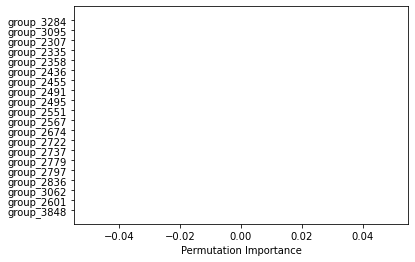

In [57]:
plt.barh(features[sorted_idx][::-1][0:20], perm_importance.importances_mean[sorted_idx][::-1][0:20])
plt.xlabel("Permutation Importance")

In [53]:
features[sorted_idx][::-1][0:120].to_csv("geneRankedSVM120.csv")

array(['group_33', 'group_1573', 'group_227', 'group_2033', 'group_1853',
       'group_926', 'group_10', 'group_347', 'group_2082', 'group_59',
       'group_738', 'group_105', 'group_2099', 'group_1929', 'group_387',
       'group_116', 'group_364', 'group_529', 'group_269', 'group_1606',
       'group_557', 'group_3128', 'group_3608', 'group_1608', 'group_454',
       'group_1923', 'group_2446', 'group_192', 'group_2661',
       'group_2693', 'dam', 'group_2631', 'group_353', 'group_2450',
       'group_2725', 'group_2787', 'group_2696', 'group_2847',
       'group_3362', 'group_3376', 'group_2625', 'group_2615',
       'group_2325', 'group_2602', 'group_360', 'group_489', 'group_642',
       'group_657', 'group_900', 'group_906', 'group_2599', 'group_956',
       'group_2569', 'group_980', 'group_2551', 'group_2412',
       'group_3025', 'group_1705', 'group_2783', 'group_356', 'group_644',
       'group_659', 'group_911', 'group_2833', 'group_2795', 'group_964',
       'group_991'

In [54]:
pd.DataFrame(features[sorted_idx][::-1]).to_csv("permimportanceSVM120.csv")
#.T.to_csv("geneRankedSVM120.csv")

# SVM Recursive Feature Elimination

In [30]:
#Preparo il training set
X = data.iloc[:,:-1].to_numpy()
y = data['lineage'].to_numpy()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

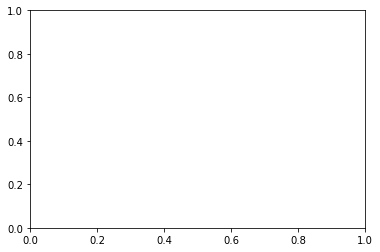

In [109]:
#ALL
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X, y)
sorted_feat_All = f_importances(abs(linear_svc.coef_[0]), features_names, top=1000)

In [97]:
classifier = LogisticRegression(random_state=0, penalty='l2',max_iter=300, solver = 'liblinear')
classifier.fit(X, y)

LogisticRegression(max_iter=300, random_state=0, solver='liblinear')

In [98]:
abs(classifier.coef_[0])

array([0.        , 0.0757227 , 0.07046396, ..., 0.09549565, 0.01897714,
       0.01897714])

In [209]:
#algortimo recursive feature elimination basato sui pesi del classificatore LogisticRegression
from sklearn.linear_model import LogisticRegression

def lg_feature_selection(X_0, y_0, f_names):  
    r = []
    
    s = [*range(0,len(X_0[0])-1,1)]
    X_train = X_0[:,s]
    y_train = y_0
    features = np.array(f_names)
    i = 0
    while (len(s) > 0):
        classifier = LogisticRegression(random_state=0, penalty='l2',max_iter=300, solver = 'liblinear')
        classifier.fit(X_train, y_train)
        f_importance = abs(classifier.coef_[0])
        sorted_idx = f_importance.argsort()
    
        
        r.append(features[sorted_idx[0]])
        X_train = np.delete(X_train,sorted_idx[0],axis = 1)
        features = np.delete(features,sorted_idx[0])       
        s = [*range(0,len(X_train[0])-1,1)]
       
    return r

In [100]:
ranked_f= lg_feature_selection(X, y, geneT.columns)

In [87]:
LGranked = np.array(ranked_f)[::-1]

pd.DataFrame(LGranked).to_csv('sorted_feat_LR.csv')

In [31]:
#algortimo recursive feature elimination basato sui pesi del classificatore svm
def svm_feature_selection_linear(X_0, y_0, f_names):  
    r = []
    
    s = [*range(0,len(X_0[0])-1,1)]
    X_train = X_0[:,s]
    y_train = y_0
    features = np.array(f_names)
    i = 0
    while (len(s) > 0):
        svc_linear = svm.SVC(kernel='linear')
        svc_linear.fit(X_train, y_train)
        f_importance = abs(svc_linear.coef_[0])
        sorted_idx = f_importance.argsort()
    
        
        r.append(features[sorted_idx[0]])
        X_train = np.delete(X_train,sorted_idx[0],axis = 1)
        features = np.delete(features,sorted_idx[0])       
        s = [*range(0,len(X_train[0])-1,1)]
       
    return r

In [32]:
ranked_f= svm_feature_selection_linear(X, y, geneT.columns)

In [33]:
geneRanked_arr = np.array(ranked_f)[::-1]
#pd.DataFrame(geneRanked_arr).to_csv('sorted_feat_SVM.csv')

In [34]:
sortedRecursive = geneRanked_arr[:150]


In [68]:
df_ranked = pd.DataFrame(sorted_feat_All, columns = ['All'])


NameError: name 'sorted_feat_All' is not defined

In [ ]:
sortedRecursive

In [64]:
df_ranked['Recursive'] = sortedRecursive
df_ranked.to_csv("ranked_all_vs_recursive.csv")

ValueError: Length of values (120) does not match length of index (1000)

In [37]:
pd.DataFrame(data[ranked_f[-180:]]).T.to_csv("geneRankedSVM180.csv")


In [38]:
#prendo le ultime features (le più importanti)
n = 180
ranked_f[-n:]


['group_2577',
 'group_357',
 'group_77',
 'group_90',
 'group_2307',
 'group_2851',
 'group_475',
 'group_388',
 'group_2833',
 'group_955',
 'group_1977',
 'group_435',
 'group_333',
 'group_227',
 'group_922',
 'group_273',
 'group_176',
 'rusA',
 'group_1122',
 'group_1376',
 'group_1492',
 'group_1127',
 'group_606',
 'group_959',
 'nlpD',
 'group_2779',
 'group_281',
 'group_223',
 'group_1907',
 'group_355',
 'malP_3',
 'group_764',
 'group_2099',
 'group_1915',
 'group_2666',
 'fimA',
 'group_269',
 'group_2570',
 'group_1485',
 'group_829',
 'group_2674',
 'group_3463',
 'group_1530',
 'group_459',
 'cas1',
 'group_2383',
 'group_2532',
 'group_2456',
 'group_1455',
 'cdiA_1',
 'group_478',
 'group_8',
 'group_914',
 'group_969',
 'group_2850',
 'group_1479',
 'group_1616',
 'group_38',
 'group_2142',
 'group_1528',
 'group_3128',
 'group_1737',
 'group_1758',
 'group_1260',
 'group_2445',
 'group_2505',
 'group_1623',
 'group_105',
 'group_1615',
 'group_1504',
 'rplP',
 'gro

In [36]:
#filtro il dataset sulle features selezionate
data_f = data[ranked_f[-n:]].join(lineage)

In [37]:
trainf, testf = train_test_split(data_f, test_size = 0.4)
X_trainf = trainf.iloc[:,:n-1].to_numpy()
X_testf = testf.iloc[:,:n-1].to_numpy()
y_trainf = trainf['lineage'].to_numpy()
y_testf = testf['lineage'].to_numpy()

In [38]:
#train con le feature selezionate
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_trainf, y_trainf)

SVC(kernel='linear')

In [39]:
y_predf = linear_svc.predict(X_testf)
metrics.confusion_matrix(y_testf, y_predf)


array([[ 39,  13],
       [  8, 108]])

In [40]:
metrics.accuracy_score(y_testf, y_predf)

0.875

In [41]:
metrics.precision_score(y_testf, y_predf,average='weighted')

0.8731317038860558

In [46]:
from sklearn.metrics import f1_score
f1_score(y_testf, y_predf, average='macro')

0.8496355964710396

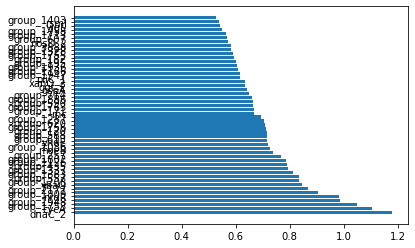

('dnaC_2',
 'cycA',
 'group_1753',
 'group_1948',
 'nrdR',
 'group_1809',
 'group_2177',
 'ybaQ',
 'group_1208',
 'group_557',
 'group_1383',
 'group_1337',
 'group_435',
 'group_1126',
 'group_1802',
 'group_257',
 'moeB',
 'group_1086',
 'yhdE',
 'group_613',
 'group_588',
 'group_120',
 'group_1756',
 'group_620',
 'group_1287',
 'rnc',
 'group_171',
 'group_1763',
 'group_590',
 'group_1886',
 'group_714',
 'gspA',
 'ggt_2',
 'xanQ_2',
 'piiC_1',
 'group_1947',
 'group_1166',
 'group_1936',
 'group_195',
 'group_182',
 'group_1755',
 'group_1328',
 'group_3888',
 'nosD_2',
 'group_607',
 'group_1713',
 'group_1758',
 'yigL',
 'rsmJ',
 'group_1403')

In [42]:
f_importances(abs(linear_svc.coef_[0]), features_names, top=50)

In [43]:
#Cross Validation
from sklearn.model_selection import cross_val_score
Xf = data_f.iloc[:,:-1].to_numpy()
yf= data_f['lineage'].to_numpy()
scores = cross_val_score(linear_svc, Xf, yf, cv=5)

In [44]:
scores

array([0.9047619 , 0.91666667, 0.94047619, 0.96428571, 0.79518072])

In [45]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.06


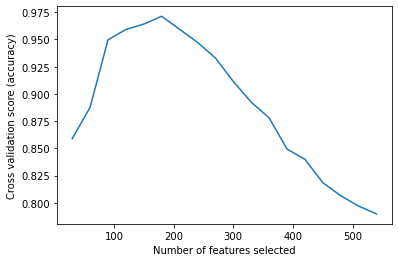

In [34]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
svc = SVC(kernel="linear")
n = [30,60,90,120,150,180,240,270,300,330,360,390,420,450,480,510,540]
grid_scores =np.zeros(len(n))
scores.mean()
for i in range(len(n)):
# Create the RFE object and compute a cross-validated score.
    data_f = data[ranked_f[-n[i]:]].join(lineage)
# The "accuracy" scoring shows the proportion of correct classifications
    Xf = data_f.iloc[:,:-1].to_numpy()
    yf= data_f['lineage'].to_numpy()
    scores = cross_val_score(linear_svc, Xf, yf, cv=10).mean()
    grid_scores[i] = scores.mean()
    
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(n,grid_scores)
plt.show()

In [35]:
grid_scores

array([0.85888502, 0.88768873, 0.94965157, 0.95917538, 0.9641115 ,
       0.97131243, 0.94732869, 0.93304297, 0.91144019, 0.89239257,
       0.87804878, 0.84941928, 0.83995354, 0.81852497, 0.80656214,
       0.79703833, 0.7898374 ])

In [36]:
print("Optimal number of features : %d" % n[grid_scores.argmax()])

Optimal number of features : 180


In [51]:
stat = pd.read_csv('dm_statistics_count.csv')

In [53]:
stat

,Gene,Unnamed: 0,Count,Mean,Std,q1,q2,q3,q4,A,B
0,group_3200,1.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0
1,group_1748,2.0,416.0,0.001373,0.001647,0.000000,0.000000,0.003115,0.009346,295,121
2,trxA,3.0,419.0,0.000633,0.003374,0.000000,0.000000,0.000000,0.054054,298,121
3,group_1352,4.0,414.0,0.005607,0.030281,0.000000,0.001616,0.001616,0.224556,293,121
4,group_1575,5.0,2.0,0.313422,0.313422,0.000000,0.313422,0.626844,0.626844,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3129,group_2614,4115.0,94.0,0.000146,0.000366,0.000000,0.000000,0.000000,0.002083,71,23
3130,group_2033,4116.0,243.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,161,82
3131,dnaQ,4119.0,418.0,0.003853,0.003192,0.001361,0.002721,0.006803,0.012245,297,121
3132,group_4010,4120.0,419.0,0.000229,0.000607,0.000000,0.000000,0.000000,0.003527,298,121


In [74]:
filt = ranked_f[-150:]
filt

['group_1448',
 'group_2393',
 'vapD_2',
 'group_12',
 'group_65',
 'group_1912',
 'group_1541',
 'pilY1_1',
 'ggt_2',
 'group_618',
 'cas1',
 'group_270',
 'group_15',
 'group_625',
 'group_55',
 'group_738',
 'group_103',
 'group_102',
 'group_2406',
 'group_62',
 'group_333',
 'group_11',
 'group_607',
 'group_48',
 'group_272',
 'group_1136',
 'group_2449',
 'rplP',
 'group_244',
 'group_1328',
 'group_1606',
 'group_1737',
 'rusA',
 'rlmD',
 'cycA',
 'group_1907',
 'porB',
 'group_105',
 'group_150',
 'group_984',
 'group_112',
 'group_1905',
 'group_1482',
 'group_434',
 'group_1122',
 'group_1506',
 'group_2013',
 'group_2040',
 'hprA',
 'group_2505',
 'group_2384',
 'group_2383',
 'pilE_6',
 'group_31',
 'group_223',
 'nosD_2',
 'mafA1',
 'group_95',
 'group_914',
 'group_1135',
 'group_1403',
 'group_2439',
 'group_1501',
 'group_1329',
 'group_1909',
 'group_1923',
 'group_1405',
 'group_2447',
 'group_2316',
 'group_901',
 'group_8',
 'group_1330',
 'group_1886',
 'group_453

In [75]:
from scipy.stats import fisher_exact
filtered_df['FishersExact'] = filtered_df.apply(
    lambda r: fisher_exact([[r.A, r.B ],[max(298,r.A)-r.A,max(121,r.B)-r.B]]),
    axis=1)

/tmp/ipykernel_40056/1604000276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['FishersExact'] = filtered_df.apply(


In [71]:
414-293

121

In [72]:
414-121

293

In [76]:
filtered_df

,Gene,Unnamed: 0,Count,Mean,Std,q1,q2,q3,q4,A,B,FishersExact
3,group_1352,4.0,414.0,0.005607,0.030281,0.000000,0.001616,0.001616,0.224556,293,121,"(0.0, 0.32747908672194276)"
45,group_79,61.0,346.0,0.225977,0.170363,0.049834,0.199336,0.368771,0.607973,242,104,"(0.7063873626373627, 0.2599708201964834)"
51,group_62,70.0,31.0,0.320779,0.279979,0.046563,0.174058,0.638581,0.783814,28,3,"(4.079012345679012, 0.012864019327620194)"
86,group_1853,113.0,263.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155,108,"(0.13047138047138046, 5.010779368997165e-14)"
103,group_1122,133.0,148.0,0.002576,0.004156,0.000000,0.000000,0.004386,0.013158,117,31,"(1.8766708251648547, 0.009363601817317215)"
...,...,...,...,...,...,...,...,...,...,...,...,...
3070,group_1923,4034.0,223.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179,44,"(2.6323529411764706, 1.377380234862354e-05)"
3072,group_1485,4036.0,158.0,0.009587,0.013049,0.000000,0.001701,0.008503,0.039116,90,68,"(0.3372454751131222, 1.3651648699368547e-06)"
3086,group_1405,4056.0,414.0,0.001538,0.022102,0.000000,0.000000,0.000000,0.319149,295,119,"(1.6526610644257702, 0.6291707113697951)"
3095,group_272,4070.0,75.0,0.015228,0.016270,0.001634,0.004902,0.032680,0.058824,61,14,"(1.967148884870404, 0.03474896456487857)"


In [38]:
data

,cysNC,group_1277,group_1352,group_1405,group_1784,group_2013,group_2063,folP,group_340,group_3888,...,group_1533,group_2637,group_2785,group_281,group_955,group_280,group_361,group_388,group_77,lineage
2855,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
13685,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
27228,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
31458,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61379,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61380,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61381,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
61382,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [84]:
countA = dict()
countB = dict()
for col in data.columns[:-1]:
    countA[col] = np.matmul(np.array(data[col]),np.array(data['lineage']))
    countB[col] = np.matmul(np.array(data[col]),np.array(1-data['lineage']))

In [85]:
countA = pd.DataFrame.from_dict(countA,orient='index',columns=['countA'])
countB = pd.DataFrame.from_dict(countB,orient='index',columns=['countB'])

In [86]:
count =countA.join(countB)

In [87]:
count

,countA,countB
cysNC,296,118
group_1277,296,118
group_1352,295,119
group_1405,297,117
group_1784,296,118
...,...,...
group_955,14,8
group_280,16,5
group_361,14,7
group_388,12,9


In [93]:
filt

['group_1448',
 'group_2393',
 'vapD_2',
 'group_12',
 'group_65',
 'group_1912',
 'group_1541',
 'pilY1_1',
 'ggt_2',
 'group_618',
 'cas1',
 'group_270',
 'group_15',
 'group_625',
 'group_55',
 'group_738',
 'group_103',
 'group_102',
 'group_2406',
 'group_62',
 'group_333',
 'group_11',
 'group_607',
 'group_48',
 'group_272',
 'group_1136',
 'group_2449',
 'rplP',
 'group_244',
 'group_1328',
 'group_1606',
 'group_1737',
 'rusA',
 'rlmD',
 'cycA',
 'group_1907',
 'porB',
 'group_105',
 'group_150',
 'group_984',
 'group_112',
 'group_1905',
 'group_1482',
 'group_434',
 'group_1122',
 'group_1506',
 'group_2013',
 'group_2040',
 'hprA',
 'group_2505',
 'group_2384',
 'group_2383',
 'pilE_6',
 'group_31',
 'group_223',
 'nosD_2',
 'mafA1',
 'group_95',
 'group_914',
 'group_1135',
 'group_1403',
 'group_2439',
 'group_1501',
 'group_1329',
 'group_1909',
 'group_1923',
 'group_1405',
 'group_2447',
 'group_2316',
 'group_901',
 'group_8',
 'group_1330',
 'group_1886',
 'group_453

In [94]:
boolean_series = count.index.isin(filt)
filtered_df = count[boolean_series]

filtered_df.reindex(filt)

,countA,countB
group_1448,14,11
group_2393,201,91
vapD_2,293,117
group_12,108,23
group_65,106,41
...,...,...
group_1533,7,15
group_1352,295,119
group_33,277,100
group_556,233,51


In [98]:
from scipy.stats import fisher_exact
filtered_df['FishersExact'] = filtered_df.apply(
    lambda r: fisher_exact([[r.countA, r.countB ],[298,121]]),
    axis=1)
filtered_df = filtered_df.reindex(filt)

/tmp/ipykernel_231181/2344366428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['FishersExact'] = filtered_df.apply(


In [99]:
filtered_df.to_csv('SVM_Fisher.csv')